In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
P = np.array([[0.1, 0.3, 0.3, 0.3],
              [0.2, 0.1, 0.2, 0.5],
              [0.1, 0.1, 0.2, 0.6],
              [0.3, 0.3, 0.2, 0.2]])

In [109]:
R = np.array([1, 0, 0, 0]).reshape(-1, 1)
gamma = 0.9

In [5]:
P**2

array([[0.01, 0.09, 0.09, 0.09],
       [0.04, 0.01, 0.04, 0.25],
       [0.01, 0.01, 0.04, 0.36],
       [0.09, 0.09, 0.04, 0.04]])

In [6]:
P**3

array([[0.001, 0.027, 0.027, 0.027],
       [0.008, 0.001, 0.008, 0.125],
       [0.001, 0.001, 0.008, 0.216],
       [0.027, 0.027, 0.008, 0.008]])

In [7]:
P**4

array([[1.000e-04, 8.100e-03, 8.100e-03, 8.100e-03],
       [1.600e-03, 1.000e-04, 1.600e-03, 6.250e-02],
       [1.000e-04, 1.000e-04, 1.600e-03, 1.296e-01],
       [8.100e-03, 8.100e-03, 1.600e-03, 1.600e-03]])

In [40]:
s = np.array([1, 0, 0, 0])
s.reshape(-1, 1)
for _ in range(1000):
    s = P @ s

In [41]:
s

array([0.19562244, 0.19562244, 0.19562244, 0.19562244])

In [42]:
eigenvalues, eigenvectors = np.linalg.eig(P)

In [110]:
V = np.zeros((4, 1))
Vs = []
for _ in range(1000):
    V = R + gamma * P @ V
    Vs.append(V)
V

array([[2.67353541],
       [1.77286324],
       [1.69754719],
       [1.83669041]])

In [111]:
V = np.zeros((4, 1))
Vs = []
for _ in range(10000):
    V = R + P @ V
    Vs.append(V)
V

array([[1956.93221436],
       [1956.04302148],
       [1955.96094213],
       [1956.11142093]])

In [112]:
A = np.eye(P.shape[0]) - gamma * P
b = R
V = np.linalg.inv(A) @ R
V

array([[2.67353541],
       [1.77286324],
       [1.69754719],
       [1.83669041]])

In [120]:
s = 0
V = 0
Gs = []
for i in range(10000):
    G = 0
    for j in range(1000):
        r = R[s, 0]
        p = P[s, :]
        s = np.random.choice(P.shape[0], p=p)
        G += gamma**j * r
    Gs.append(G)
    alpha = 1/(i + 1)
    V = (1 - alpha)*V + alpha*(G - V)
V

0.9758690349325011

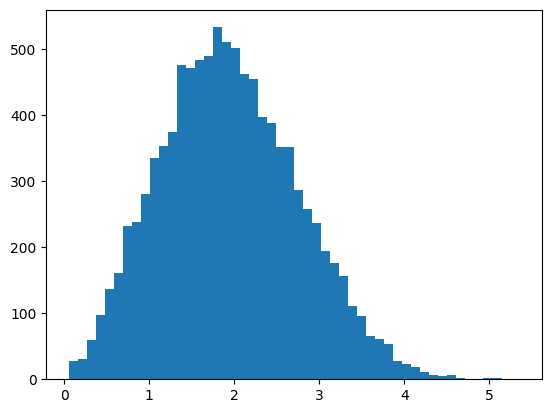

In [121]:
plt.hist(Gs, bins=50);